Importing necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
titanic=pd.read_csv("C:/Users/shree/OneDrive/Desktop/Internship/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
miss_values = titanic.isnull().sum()
miss_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
x=titanic['Age'].median()
x

28.0

In [6]:
titanic['Age'].fillna(x,inplace=True)

In [7]:
s=titanic['Embarked'].mode()[0]
s

'S'

In [8]:
titanic['Embarked'].fillna(s,inplace=True)

In [9]:
titanic = titanic.drop(columns=['Name', 'Ticket', 'Cabin','PassengerId'])

In [10]:
# Create a LabelEncoder object
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
titanic["Sex"] = l.fit_transform(titanic["Sex"])
titanic["Embarked"] = l.fit_transform(titanic["Embarked"])
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# Visualisation

# Bar Plot

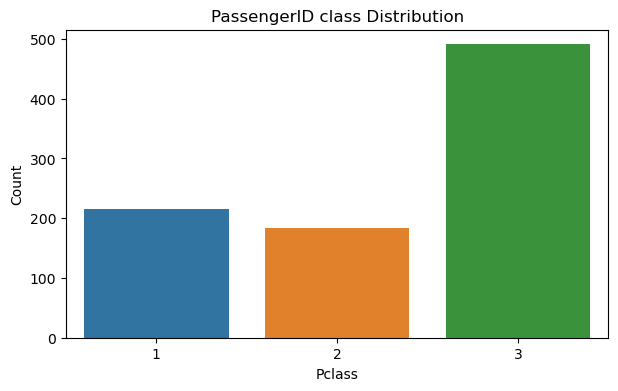

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(data = titanic, x='Pclass')
plt.title('PassengerID class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Scatter Plot 

For Age vs Fare

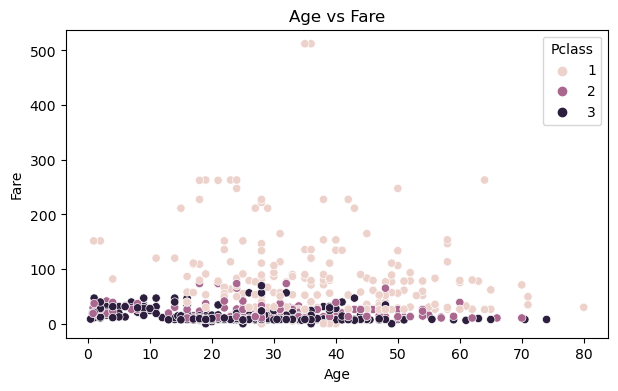

In [12]:
plt.figure(figsize=(7,4))
sns.scatterplot(data = titanic, x='Age', y='Fare', hue='Pclass')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Joint PLot 

For Age vs Fare

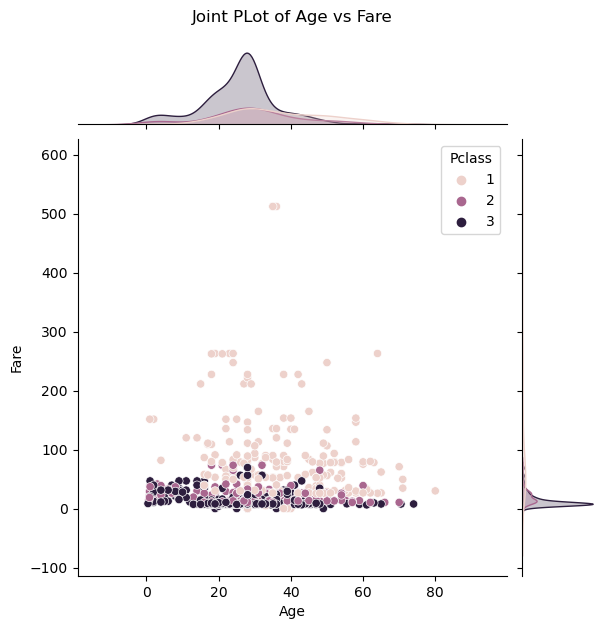

In [13]:
sns.jointplot(data = titanic, x='Age', y='Fare', hue='Pclass')
plt.title('Joint PLot of Age vs Fare', y=1.25)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Pie chart 
for the 'Pclass' column

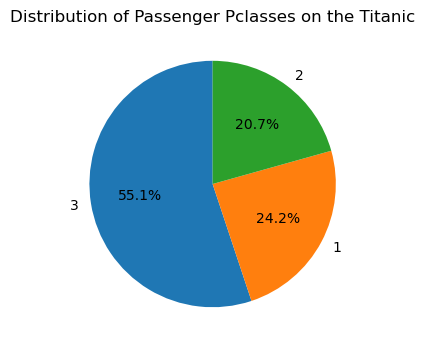

In [14]:
Pclass_counts = titanic['Pclass'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(Pclass_counts, labels=Pclass_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passenger Pclasses on the Titanic')
plt.show()

# Model Bulding:
* 1.choose the dependent and independent variable :

In [15]:
dependent_variable = 'Survived'
independent_variables = titanic.columns.tolist()
independent_variables.remove(dependent_variable)
print(dependent_variable)
print(independent_variables)

Survived
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


* 2.Split data into train test ,80:20

In [16]:
from sklearn.model_selection import train_test_split

# Separate the independent variables X and dependent variable y
X = titanic[independent_variables]
y = titanic[dependent_variable]

# Split the data into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 7)
X_test shape: (179, 7)
y_train shape: (712,)
y_test shape: (179,)


 * 3.fit naive bays model on train data

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

# Gaussian Naive Bayes
gnb = GaussianNB()

# To Train
gnb.fit(X_train, y_train)

# To predict
y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[96 15]
 [18 50]]


In [19]:
recall= recall_score(y_test, y_pred)
recall

0.7352941176470589

In [20]:
precision= precision_score(y_test, y_pred)
precision

0.7692307692307693

# Model evaluation

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8156424581005587

Confusion Matrix:
 [[96 15]
 [18 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       111
           1       0.77      0.74      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



# KNN Algorithm

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#evaluate model
accu = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print("Accuracy",accu)
print("Confusion Matrix :")
print(conf_matrix)
print("Classification Report :")
print(class_report)


Accuracy 0.7597765363128491
Confusion Matrix :
[[93 18]
 [25 43]]
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       111
           1       0.70      0.63      0.67        68

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [22]:
recall= recall_score(y_test, y_pred)
recall

0.6323529411764706

In [23]:
precision= precision_score(y_test, y_pred)
precision

0.7049180327868853

# Decision Tree

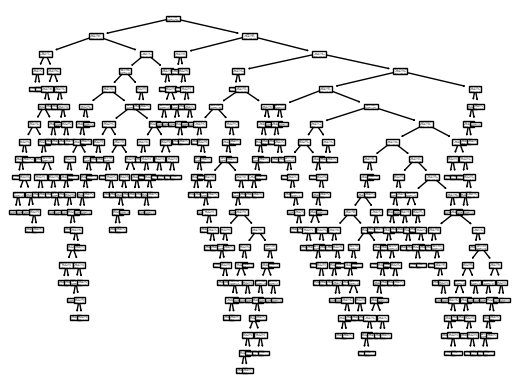

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
x=titanic[independent_variables]
y=titanic[dependent_variable]
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)
tree.plot_tree(dtree, feature_names= independent_variables )
plt.show()

In [25]:
dt_pred= dtree.predict(X_test)
dt_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accu = accuracy_score(y_test,dt_pred)
conf_matrix = confusion_matrix(y_test,dt_pred)
class_report = classification_report(y_test,dt_pred)

print("Accuracy",accu)
print("Confusion Matrix :")
print(conf_matrix)
print("Classification Report :")
print(class_report)

Accuracy 0.9720670391061452
Confusion Matrix :
[[111   0]
 [  5  63]]
Classification Report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       111
           1       1.00      0.93      0.96        68

    accuracy                           0.97       179
   macro avg       0.98      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179



In [27]:
recall= recall_score(y_test, y_pred)
recall

0.6323529411764706

In [28]:
precision= precision_score(y_test, y_pred)
precision

0.7049180327868853

# Comparision

In [30]:
models = {'Naive Bayes':GaussianNB(),'k-Nearest Neighbors':KNeighborsClassifier(n_neighbors = 5),'Decision Tree':DecisionTreeClassifier()}

In [31]:
Res=[]
for model_name, model in models.items():
    model.fit(X_train,y_train)
    predict_y = model.predict(X_test)
    accuracy = accuracy_score(y_test, predict_y)
    precision = precision_score(y_test, predict_y)
    recall = recall_score(y_test, predict_y)
    Res.append({"Model":model_name,"Accuracy":accuracy, "Precision":precision, "Recall":recall})
    
import pandas as pd
Result = pd.DataFrame(Res)
Result


,Model,Accuracy,Precision,Recall
0,Naive Bayes,0.815642,0.769231,0.735294
1,k-Nearest Neighbors,0.759777,0.704918,0.632353
2,Decision Tree,0.826816,0.793651,0.735294
